# Image Crop
YOLO에서 output되는 tensor를 가지고 해당 이미지를 cropping하는 과정 <br>
output tensor는 nms_bbox : [N * [category, class_prob, cx, cy, w, h]]의 shape (N은 detection 된 object 수)

In [1]:
# output tensor Examples
# [[category, class_prob, cx, cy, w, h]]
# [[1.0, 0.9222851991653442, 0.510574460029602, 0.322565495967865, 0.41439366340637207, 0.6281094551086426]]
# [[1.0, 0.8868504166603088, 0.606023371219635, 0.35435596108436584, 0.2391318827867508, 0.30057305097579956], [1.0, 0.8601543307304382, 0.37735438346862793, 0.2570606768131256, 0.3054003119468689, 0.4255877733230591]]

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
from PIL import Image
import torchvision.transforms as transforms
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # Dead kernel ERROR 해결

In [2]:
# image crop example

image = Variable(torch.rand(416,416,3))

cropped_image = image[5:120, 0:145,:]

In [3]:
width , height = 416, 416  # image size

In [18]:
# output tensor example (N=1)
# a = torch.tensor([[1, 0.922, 0.510574, 0.322565, 0.414393, 0.628109]])     
# img_name = '1002.jpg'
# output tensor example (N=2)
a = torch.tensor([[1, 0.886, 0.606023, 0.354355, 0.239131, 0.300573],[1, 0.860, 0.377354, 0.257060, 0.305400, 0.425587]]) 
img_name = '1003.jpg'
N = len(a)

xywh = a[...,2:]
xywh[...,[0,2]] *= width
xywh[...,[1,3]] *= height

x, y, w, h = xywh[...,0], xywh[...,1], xywh[...,2], xywh[...,3]

lx, ly, rx, ry = x - w / 2, y - h / 2, x + w / 2, y + h / 2 
lx, ly, rx, ry = lx.int(), ly.int(), rx.int(), ry.int()

In [19]:
img = Image.open(img_name)

img_w, img_h = img.size

print(img_w, img_h)

341 450


In [20]:
if img_w < width:
    LR = width - img_w
    L, R = int(LR / 2), int(LR / 2)
else:
    L, R = 0, 0
    
if img_h < height:
    TB = height - img_h
    T, B = int(TB / 2), int(TB / 2)
else:
    T, B = 0, 0
    
print(T, R, B, L) # margin : top, right, bottom, left

0 37 0 37


In [21]:
def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

In [22]:
margin_img = add_margin(img, T, R, B ,L ,(0, 0, 0)).resize((416,416))

In [23]:
tf = transforms.ToTensor()
img_t = tf(margin_img)
img_t = img_t.permute(1,2,0)
print(img_t.shape)

torch.Size([416, 416, 3])


torch.Size([126, 100, 3])


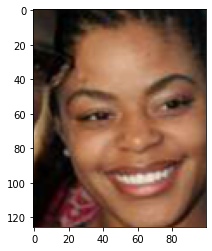

torch.Size([178, 128, 3])


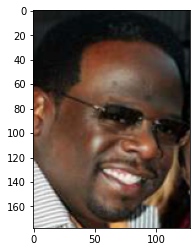

In [24]:
for i in range(N):
    cropped_img = img_t[ly[i]:ry[i]+1, lx[i]:rx[i]+1, :]
    print(cropped_img.shape)
    im = np.array(cropped_img)
    plt.imshow(im)
    plt.show()